In [61]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import randrange,uniform
from sklearn.metrics import r2_score
from scipy import stats

In [62]:
!pip install klib

In [63]:
!pip install delayed

In [64]:
os.getcwd()

'/content'

In [65]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [66]:
import pandas as pd
Train = pd.read_excel(r'/content/gdrive/MyDrive/Colab Notebooks/Flight_Ticket_Participant_Datasets/Data_Train.xlsx')
Test = pd.read_excel(r'/content/gdrive/MyDrive/Colab Notebooks/Flight_Ticket_Participant_Datasets/Test_set.xlsx')
Data_Day = pd.concat([Train, Test])
Data_Day

Airline Date_of_Journey  ... Additional_Info    Price
0                IndiGo      24/03/2019  ...         No info   3897.0
1             Air India       1/05/2019  ...         No info   7662.0
2           Jet Airways       9/06/2019  ...         No info  13882.0
3                IndiGo      12/05/2019  ...         No info   6218.0
4                IndiGo      01/03/2019  ...         No info  13302.0
...                 ...             ...  ...             ...      ...
2666          Air India       6/06/2019  ...         No info      NaN
2667             IndiGo      27/03/2019  ...         No info      NaN
2668        Jet Airways       6/03/2019  ...         No info      NaN
2669          Air India       6/03/2019  ...         No info      NaN
2670  Multiple carriers      15/06/2019  ...         No info      NaN

[13354 rows x 11 columns]

In [67]:
Data_Day['Date_of_Journey'] = pd.to_datetime(Data_Day.Date_of_Journey)
Data_Day['Date_of_Journey'] = Data_Day['Date_of_Journey'].dt.strftime('%Y-%m-%d')
Data_Day

Airline Date_of_Journey  ... Additional_Info    Price
0                IndiGo      2019-03-24  ...         No info   3897.0
1             Air India      2019-01-05  ...         No info   7662.0
2           Jet Airways      2019-09-06  ...         No info  13882.0
3                IndiGo      2019-12-05  ...         No info   6218.0
4                IndiGo      2019-01-03  ...         No info  13302.0
...                 ...             ...  ...             ...      ...
2666          Air India      2019-06-06  ...         No info      NaN
2667             IndiGo      2019-03-27  ...         No info      NaN
2668        Jet Airways      2019-06-03  ...         No info      NaN
2669          Air India      2019-06-03  ...         No info      NaN
2670  Multiple carriers      2019-06-15  ...         No info      NaN

[13354 rows x 11 columns]

In [68]:
Data_Day.nunique()

Airline              12
Date_of_Journey      40
Source                5
Destination           6
Route               132
Dep_Time            223
Arrival_Time       1451
Duration            374
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

In [69]:
Data_Day['Date'] = pd.to_datetime(Data_Day['Date_of_Journey'], errors='coerce')
Data_Day['Dep_Time'] = pd.to_datetime(Data_Day['Dep_Time'], errors='coerce')
Data_Day['Arrival_Time'] = pd.to_datetime(Data_Day['Arrival_Time'], errors='coerce')
Data_Day

Airline Date_of_Journey  ...    Price       Date
0                IndiGo      2019-03-24  ...   3897.0 2019-03-24
1             Air India      2019-01-05  ...   7662.0 2019-01-05
2           Jet Airways      2019-09-06  ...  13882.0 2019-09-06
3                IndiGo      2019-12-05  ...   6218.0 2019-12-05
4                IndiGo      2019-01-03  ...  13302.0 2019-01-03
...                 ...             ...  ...      ...        ...
2666          Air India      2019-06-06  ...      NaN 2019-06-06
2667             IndiGo      2019-03-27  ...      NaN 2019-03-27
2668        Jet Airways      2019-06-03  ...      NaN 2019-06-03
2669          Air India      2019-06-03  ...      NaN 2019-06-03
2670  Multiple carriers      2019-06-15  ...      NaN 2019-06-15

[13354 rows x 12 columns]

In [70]:
from datetime import datetime
Data_Day['Month'] = Data_Day['Date'].apply(lambda time: time.month)
Data_Day['Day of Week'] = Data_Day['Date'].apply(lambda time: time.dayofweek)
Data_Day['Year'] = Data_Day['Date'].apply(lambda t: t.year)
Data_Day['Date'] = Data_Day['Date'].apply(lambda t: t.day)
Data_Day['Dep_Time_Hour'] = Data_Day['Dep_Time'].dt.hour
Data_Day['Arrival_Time_Hour'] = Data_Day['Arrival_Time'].dt.hour
Data_Day.drop(['Date_of_Journey', 'Arrival_Time', 'Dep_Time'], axis=1, inplace = True)
Data_Day

Airline    Source  ... Dep_Time_Hour Arrival_Time_Hour
0                IndiGo  Banglore  ...            22                 1
1             Air India   Kolkata  ...             5                13
2           Jet Airways     Delhi  ...             9                 4
3                IndiGo   Kolkata  ...            18                23
4                IndiGo  Banglore  ...            16                21
...                 ...       ...  ...           ...               ...
2666          Air India   Kolkata  ...            20                20
2667             IndiGo   Kolkata  ...            14                16
2668        Jet Airways     Delhi  ...            21                 4
2669          Air India     Delhi  ...             4                19
2670  Multiple carriers     Delhi  ...             4                19

[13354 rows x 14 columns]

In [71]:
Data_Day['Journey_Duration'] = (pd.to_timedelta(Data_Day['Duration']).dt.seconds // 60).astype(str) + 'm'
Data_Day.drop(['Duration'], axis=1, inplace = True)
Data_Day

Airline    Source  ... Arrival_Time_Hour Journey_Duration
0                IndiGo  Banglore  ...                 1             170m
1             Air India   Kolkata  ...                13             445m
2           Jet Airways     Delhi  ...                 4            1140m
3                IndiGo   Kolkata  ...                23             325m
4                IndiGo  Banglore  ...                21             285m
...                 ...       ...  ...               ...              ...
2666          Air India   Kolkata  ...                20            1435m
2667             IndiGo   Kolkata  ...                16             155m
2668        Jet Airways     Delhi  ...                 4             395m
2669          Air India     Delhi  ...                19             915m
2670  Multiple carriers     Delhi  ...                19             860m

[13354 rows x 14 columns]

# EXPLORATORY DATA ANALYSIS

In [72]:
Data_Day.info

<bound method DataFrame.info of                 Airline    Source  ... Arrival_Time_Hour Journey_Duration
0                IndiGo  Banglore  ...                 1             170m
1             Air India   Kolkata  ...                13             445m
2           Jet Airways     Delhi  ...                 4            1140m
3                IndiGo   Kolkata  ...                23             325m
4                IndiGo  Banglore  ...                21             285m
...                 ...       ...  ...               ...              ...
2666          Air India   Kolkata  ...                20            1435m
2667             IndiGo   Kolkata  ...                16             155m
2668        Jet Airways     Delhi  ...                 4             395m
2669          Air India     Delhi  ...                19             915m
2670  Multiple carriers     Delhi  ...                19             860m

[13354 rows x 14 columns]>

In [73]:
Data_Day.describe()

Price          Date  ...  Dep_Time_Hour  Arrival_Time_Hour
count  10683.000000  13354.000000  ...   13354.000000       13354.000000
mean    9087.064121     12.551146  ...      12.513254          13.396061
std     4611.359167      8.759967  ...       5.736273           6.896145
min     1759.000000      3.000000  ...       0.000000           0.000000
25%     5277.000000      5.000000  ...       8.000000           8.000000
50%     8372.000000      6.000000  ...      11.000000          14.000000
75%    12373.000000     21.000000  ...      18.000000          19.000000
max    79512.000000     27.000000  ...      23.000000          23.000000

[8 rows x 7 columns]

In [74]:
#Data Types of Varaibles
print(Data_Day.dtypes)

Airline               object
Source                object
Destination           object
Route                 object
Total_Stops           object
Additional_Info       object
Price                float64
Date                   int64
Month                  int64
Day of Week            int64
Year                   int64
Dep_Time_Hour          int64
Arrival_Time_Hour      int64
Journey_Duration      object
dtype: object


In [75]:
#Dimension
Data_Day.shape

(13354, 14)

In [76]:
#unique values present in each variable
Data_Day.nunique()

Airline                12
Source                  5
Destination             6
Route                 132
Total_Stops             5
Additional_Info        10
Price                1870
Date                    9
Month                   7
Day of Week             7
Year                    1
Dep_Time_Hour          24
Arrival_Time_Hour      24
Journey_Duration      286
dtype: int64

In [77]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


In [78]:
import pandas_profiling
report = pandas_profiling.ProfileReport(Data_Day)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [79]:
Data_Day.dropna(inplace = True)
Data_Day

Airline    Source  ... Arrival_Time_Hour Journey_Duration
0           IndiGo  Banglore  ...                 1             170m
1        Air India   Kolkata  ...                13             445m
2      Jet Airways     Delhi  ...                 4            1140m
3           IndiGo   Kolkata  ...                23             325m
4           IndiGo  Banglore  ...                21             285m
...            ...       ...  ...               ...              ...
10678     Air Asia   Kolkata  ...                22             150m
10679    Air India   Kolkata  ...                23             155m
10680  Jet Airways  Banglore  ...                11             180m
10681      Vistara  Banglore  ...                14             160m
10682    Air India     Delhi  ...                19             500m

[10682 rows x 14 columns]

In [80]:
#Deleting duplicate rows
Data_Day = Data_Day.drop_duplicates()
Data_Day

Airline    Source  ... Arrival_Time_Hour Journey_Duration
0           IndiGo  Banglore  ...                 1             170m
1        Air India   Kolkata  ...                13             445m
2      Jet Airways     Delhi  ...                 4            1140m
3           IndiGo   Kolkata  ...                23             325m
4           IndiGo  Banglore  ...                21             285m
...            ...       ...  ...               ...              ...
10678     Air Asia   Kolkata  ...                22             150m
10679    Air India   Kolkata  ...                23             155m
10680  Jet Airways  Banglore  ...                11             180m
10681      Vistara  Banglore  ...                14             160m
10682    Air India     Delhi  ...                19             500m

[10438 rows x 14 columns]

In [81]:
#Data Types of Varaibles
print(Data_Day.dtypes)

Airline               object
Source                object
Destination           object
Route                 object
Total_Stops           object
Additional_Info       object
Price                float64
Date                   int64
Month                  int64
Day of Week            int64
Year                   int64
Dep_Time_Hour          int64
Arrival_Time_Hour      int64
Journey_Duration      object
dtype: object


In [82]:
#columns 
Data_Day.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'Date', 'Month', 'Day of Week', 'Year',
       'Dep_Time_Hour', 'Arrival_Time_Hour', 'Journey_Duration'],
      dtype='object')

In [83]:
# Import label encoder
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
Data_Day['Airline']= label_encoder.fit_transform(Data_Day['Airline'])
Data_Day['Source']= label_encoder.fit_transform(Data_Day['Source'])
Data_Day['Destination']= label_encoder.fit_transform(Data_Day['Destination'])
Data_Day['Route']= label_encoder.fit_transform(Data_Day['Route'])
Data_Day['Total_Stops']= label_encoder.fit_transform(Data_Day['Total_Stops'])
Data_Day

Airline  Source  ...  Arrival_Time_Hour  Journey_Duration
0            3       0  ...                  1              170m
1            1       3  ...                 13              445m
2            4       2  ...                  4             1140m
3            3       3  ...                 23              325m
4            3       0  ...                 21              285m
...        ...     ...  ...                ...               ...
10678        0       3  ...                 22              150m
10679        1       3  ...                 23              155m
10680        4       0  ...                 11              180m
10681       10       0  ...                 14              160m
10682        1       2  ...                 19              500m

[10438 rows x 14 columns]

In [84]:
Data_Day['Total_Stops'].unique()

array([4, 1, 0, 2, 3])

In [85]:
#Data Types of Varaibles
print(Data_Day.dtypes)

Airline                int64
Source                 int64
Destination            int64
Route                  int64
Total_Stops            int64
Additional_Info       object
Price                float64
Date                   int64
Month                  int64
Day of Week            int64
Year                   int64
Dep_Time_Hour          int64
Arrival_Time_Hour      int64
Journey_Duration      object
dtype: object


In [86]:
#Defining numeric and categorical variables and saving in specific array
numeric_var = ['Price']
categorical_var = ['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Date', 'Month', 'Day of Week', 'Year',
       'Dep_Time_Hour', 'Arrival_Time_Hour', 'Journey_Duration']

# DATA PRE PROCESSING

In [87]:
#sum of missing values 
Data_Day.isnull().sum()

Airline              0
Source               0
Destination          0
Route                0
Total_Stops          0
Additional_Info      0
Price                0
Date                 0
Month                0
Day of Week          0
Year                 0
Dep_Time_Hour        0
Arrival_Time_Hour    0
Journey_Duration     0
dtype: int64

In [88]:
#Outlier analysis

Price


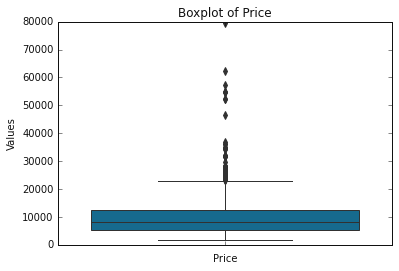

In [89]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

for i in numeric_var:
    print(i)
    sns.boxplot(y = Data_Day[i])
    plt.xlabel(i)
    plt.ylabel("Values")
    plt.title("Boxplot of " + i)
    plt.show()

***We are getting some outliers in the above graphs.***

In [90]:
# Identify outliers
#calculate Inner Fence, Outer Fence, and IQR

for i in numeric_var:
    print(i)
    q75, q25 = np.percentile(Data_Day.loc[:,i], [75, 25])
    iqr = q75 - q25
    Innerfence = q25 - (iqr*1.5)
    Upperfence = q75 + (iqr*1.5)
    print("Innerfence= "+str(Innerfence))
    print("Upperfence= "+str(Upperfence)) 
    print("IQR ="+str(iqr))

# replace outliers with NA
    Data_Day.loc[Data_Day[i]<Innerfence, i] = np.nan
    Data_Day.loc[Data_Day[i]>Upperfence, i] = np.nan

Price
Innerfence= -5450.5
Upperfence= 23025.5
IQR =7119.0


Price


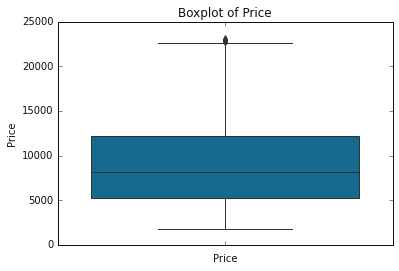

In [91]:
###Checking null values again
for i in numeric_var:
    print(i)
    sns.boxplot(y = Data_Day[i])
    plt.xlabel(i)
    plt.ylabel("Price")
    plt.title("Boxplot of " + i)
    plt.show()

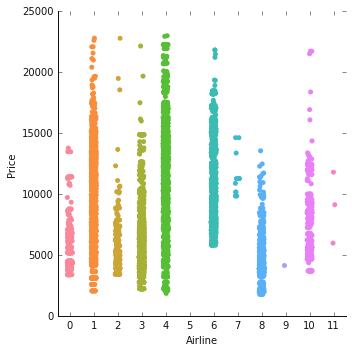

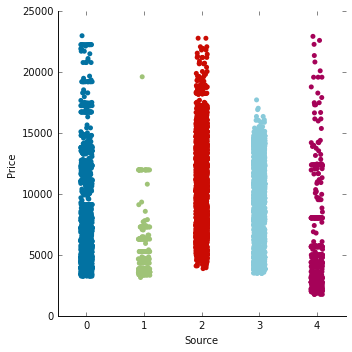

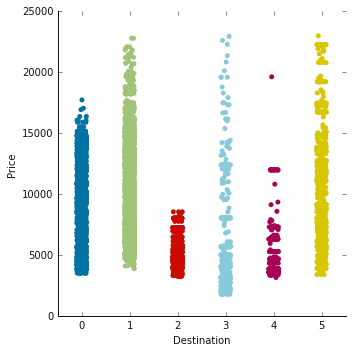

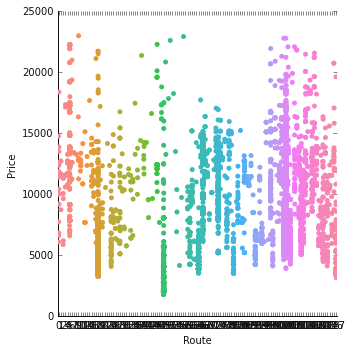

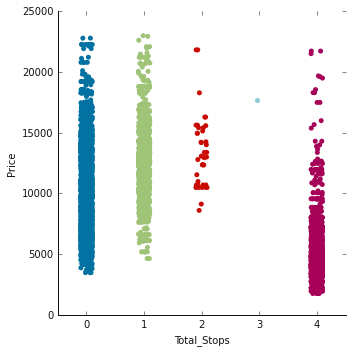

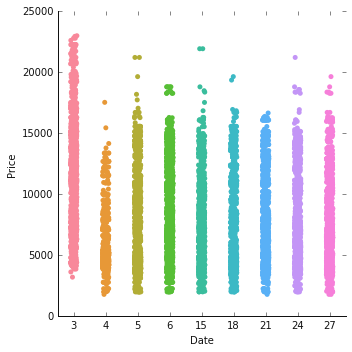

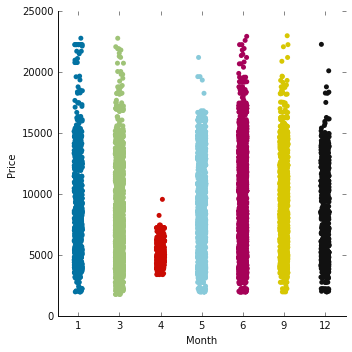

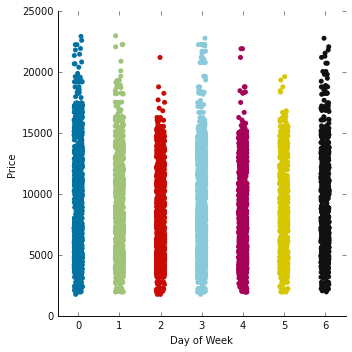

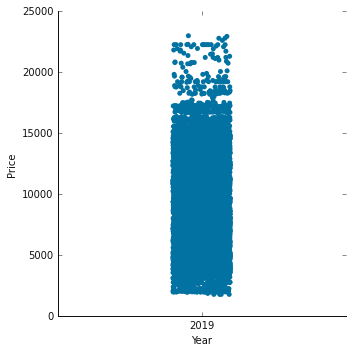

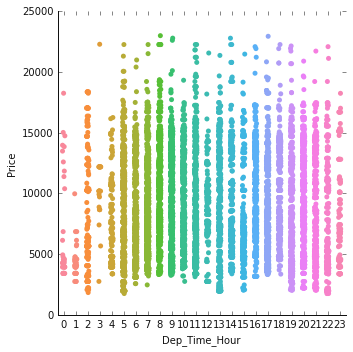

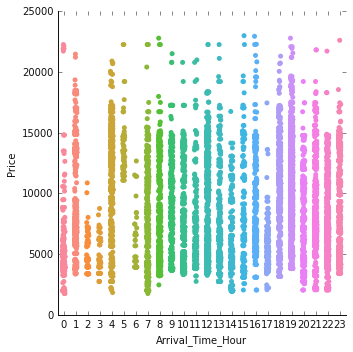

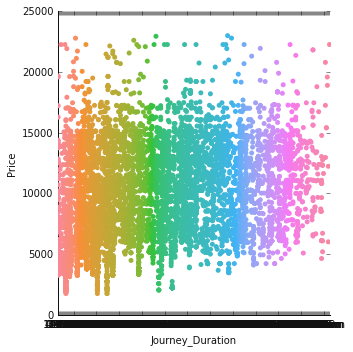

In [92]:
for i in categorical_var:
  sns.catplot(x = i, y = "Price", data=Data_Day, linewidths=.15)

                    Airline    Source  ...  Dep_Time_Hour  Arrival_Time_Hour
Airline            1.000000 -0.100885  ...      -0.166430          -0.110440
Source            -0.100885  1.000000  ...       0.049184           0.037826
Destination        0.055534 -0.900180  ...      -0.098471          -0.108895
Route             -0.046790  0.726247  ...      -0.147335           0.048175
Total_Stops        0.073255 -0.529804  ...       0.047804          -0.207354
Price             -0.128963  0.295604  ...      -0.038504           0.113647
Date               0.022102 -0.006863  ...      -0.078526          -0.061536
Month             -0.086535  0.124160  ...       0.015066          -0.042220
Day of Week       -0.087878  0.108649  ...      -0.046698          -0.037332
Year                    NaN       NaN  ...            NaN                NaN
Dep_Time_Hour     -0.166430  0.049184  ...       1.000000          -0.097586
Arrival_Time_Hour -0.110440  0.037826  ...      -0.097586           1.000000

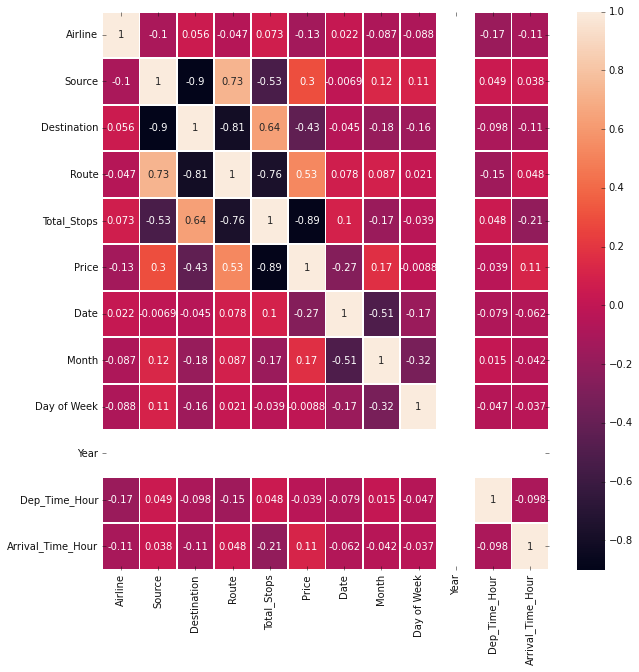

In [93]:
#Feature engineering
# Correlation Analysis and Anova test to find varaibles which can be excluded
Data_Day_cor = Data_Day.corr()
correlation_result = Data_Day_cor.corr()
print(correlation_result)
fig, ax = plt.subplots(figsize=(10,10)) ##To plot the heatmap into our required size
heatmap = sns.heatmap(correlation_result, annot=True, linewidths=.8)

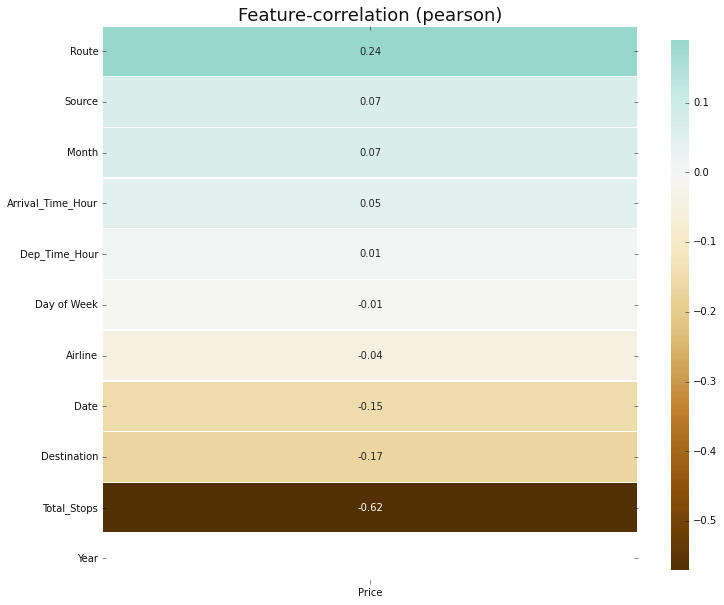

In [94]:
import klib
klib.corr_plot(Data_Day, target='Price')

In [95]:
#columns 
Data_Day.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'Date', 'Month', 'Day of Week', 'Year',
       'Dep_Time_Hour', 'Arrival_Time_Hour', 'Journey_Duration'],
      dtype='object')

In [96]:
Data_Day.drop(['Airline','Year', 'Source', 'Dep_Time_Hour', 'Arrival_Time_Hour', 'Journey_Duration'], axis=1, inplace = True) ##Removing the unimportant columns
Data_Day

Destination  Route  Total_Stops  ... Date  Month  Day of Week
0                5     18            4  ...   24      3            6
1                0     84            1  ...    5      1            5
2                1    118            1  ...    6      9            4
3                0     91            0  ...    5     12            3
4                5     29            0  ...    3      1            3
...            ...    ...          ...  ...  ...    ...          ...
10678            0     64            4  ...    4      9            2
10679            0     64            4  ...   27      4            5
10680            2     18            4  ...   27      4            5
10681            5     18            4  ...    3      1            3
10682            1    108            1  ...    5      9            3

[10438 rows x 8 columns]

In [97]:
Data_Day.describe()

Destination         Route  ...         Month   Day of Week
count  10438.000000  10438.000000  ...  10438.000000  10438.000000
mean       1.438302     74.393562  ...      5.537172      2.889826
std        1.481506     36.664446  ...      2.996038      1.831853
min        0.000000      0.000000  ...      1.000000      0.000000
25%        0.000000     48.000000  ...      3.000000      1.000000
50%        1.000000     73.000000  ...      5.000000      3.000000
75%        2.000000    104.000000  ...      6.000000      4.000000
max        5.000000    127.000000  ...     12.000000      6.000000

[8 rows x 7 columns]

In [98]:
Data_Day

Destination  Route  Total_Stops  ... Date  Month  Day of Week
0                5     18            4  ...   24      3            6
1                0     84            1  ...    5      1            5
2                1    118            1  ...    6      9            4
3                0     91            0  ...    5     12            3
4                5     29            0  ...    3      1            3
...            ...    ...          ...  ...  ...    ...          ...
10678            0     64            4  ...    4      9            2
10679            0     64            4  ...   27      4            5
10680            2     18            4  ...   27      4            5
10681            5     18            4  ...    3      1            3
10682            1    108            1  ...    5      9            3

[10438 rows x 8 columns]

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


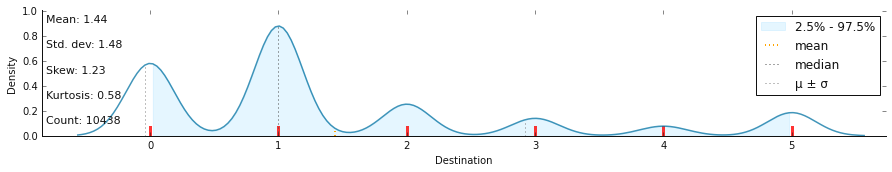

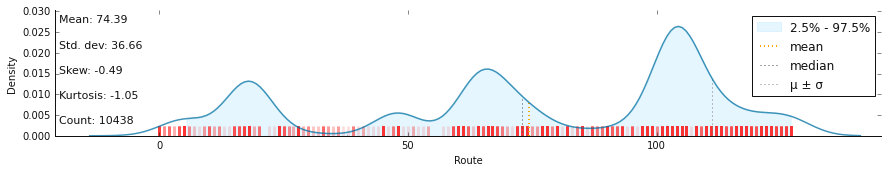

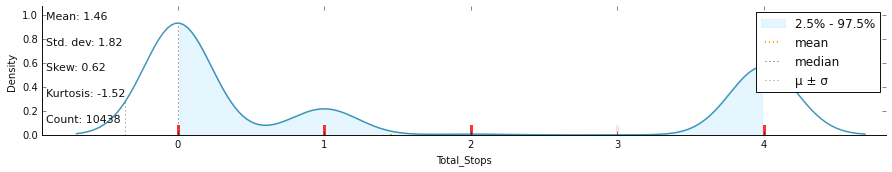

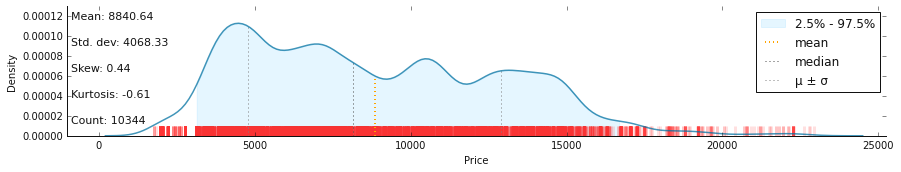

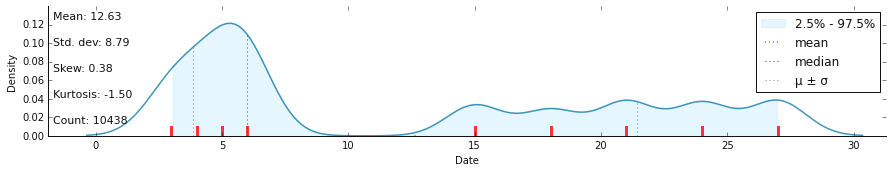

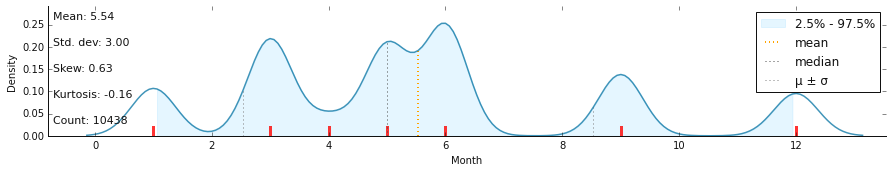

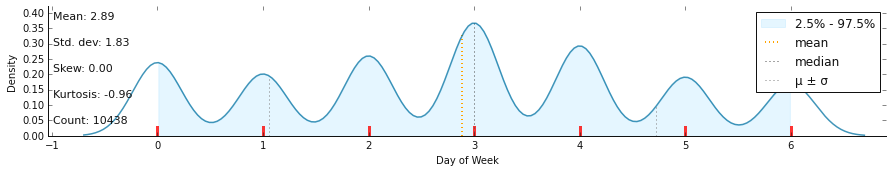

In [99]:
#Feature scalling
klib.dist_plot(Data_Day)

***Here we can eaisly infer that almost every variable is distribute  allmost normely in bell curve, except total bags. Also, Year has come twice.

In [100]:
!pip install pycaret[Full]==2.3. 4

In [101]:
from pycaret.regression import *

In [102]:
Data_Day

Destination  Route  Total_Stops  ... Date  Month  Day of Week
0                5     18            4  ...   24      3            6
1                0     84            1  ...    5      1            5
2                1    118            1  ...    6      9            4
3                0     91            0  ...    5     12            3
4                5     29            0  ...    3      1            3
...            ...    ...          ...  ...  ...    ...          ...
10678            0     64            4  ...    4      9            2
10679            0     64            4  ...   27      4            5
10680            2     18            4  ...   27      4            5
10681            5     18            4  ...    3      1            3
10682            1    108            1  ...    5      9            3

[10438 rows x 8 columns]

In [103]:
Data_Day.dropna(inplace = True)
Data_Day

Destination  Route  Total_Stops  ... Date  Month  Day of Week
0                5     18            4  ...   24      3            6
1                0     84            1  ...    5      1            5
2                1    118            1  ...    6      9            4
3                0     91            0  ...    5     12            3
4                5     29            0  ...    3      1            3
...            ...    ...          ...  ...  ...    ...          ...
10678            0     64            4  ...    4      9            2
10679            0     64            4  ...   27      4            5
10680            2     18            4  ...   27      4            5
10681            5     18            4  ...    3      1            3
10682            1    108            1  ...    5      9            3

[10344 rows x 8 columns]

Missing value during model deployment may produce errors during execution

In [104]:
s = setup(Data_Day, target = 'Price')

Description             Value
0                               session_id              5939
1                                   Target             Price
2                            Original Data        (10344, 8)
3                           Missing Values             False
4                         Numeric Features                 1
5                     Categorical Features                 6
6                         Ordinal Features             False
7                High Cardinality Features             False
8                  High Cardinality Method              None
9                    Transformed Train Set        (7240, 42)
10                    Transformed Test Set        (3104, 42)
11                      Shuffle Train-Test              True
12                     Stratify Train-Test             False
13                          Fold Generator             KFold
14                             Fold Number                10
15                                CPU Jobs                -1
16                                 Use GPU             False
17                          Log Experiment             False
18                         Experiment Name  reg-default-name
19                                     USI              7a91
20                         Imputation Type            simple
21          Iterative Imputation Iteration              None
22                         Numeric Imputer              mean
23      Iterative Imputation Numeric Model              None
24                     Categorical Imputer          constant
25  Iterative Imputation Categorical Model              None
26           Unknown Categoricals Handling    least_frequent
27                               Normalize             False
28                        Normalize Method              None
29                          Transformation             False
30                   Transformation Method              None
31                                     PCA             False
32                              PCA Method              None
33                          PCA Components              None
34                     Ignore Low Variance             False
35                     Combine Rare Levels             False
36                    Rare Level Threshold              None
37                         Numeric Binning             False
38                         Remove Outliers             False
39                      Outliers Threshold              None
40                Remove Multicollinearity             False
41             Multicollinearity Threshold              None
42                              Clustering             False
43                    Clustering Iteration              None
44                     Polynomial Features             False
45                       Polynomial Degree              None
46                    Trignometry Features             False
47                    Polynomial Threshold              None
48                          Group Features             False
49                       Feature Selection             False
50                Feature Selection Method           classic
51            Features Selection Threshold              None
52                     Feature Interaction             False
53                           Feature Ratio             False
54                   Interaction Threshold              None
55                        Transform Target             False
56                 Transform Target Method           box-cox

***Regression*** - Since ***Total Volume*** prediction would be a regression problem. Regression models would be tried & tasted hereafter.

In [105]:
models()

Name  ...  Turbo
ID                                           ...       
lr                        Linear Regression  ...   True
lasso                      Lasso Regression  ...   True
ridge                      Ridge Regression  ...   True
en                              Elastic Net  ...   True
lar                  Least Angle Regression  ...   True
llar           Lasso Least Angle Regression  ...   True
omp             Orthogonal Matching Pursuit  ...   True
br                           Bayesian Ridge  ...   True
ard       Automatic Relevance Determination  ...  False
par            Passive Aggressive Regressor  ...   True
ransac              Random Sample Consensus  ...  False
tr                       TheilSen Regressor  ...  False
huber                       Huber Regressor  ...   True
kr                             Kernel Ridge  ...  False
svm               Support Vector Regression  ...  False
knn                   K Neighbors Regressor  ...   True
dt                  Decision Tree Regressor  ...   True
rf                  Random Forest Regressor  ...   True
et                    Extra Trees Regressor  ...   True
ada                      AdaBoost Regressor  ...   True
gbr             Gradient Boosting Regressor  ...   True
mlp                           MLP Regressor  ...  False
xgboost           Extreme Gradient Boosting  ...   True
lightgbm    Light Gradient Boosting Machine  ...   True
catboost                 CatBoost Regressor  ...   True

[25 rows x 3 columns]

In [106]:
# compare all models
best_model = compare_models()  ##Best model with 10 fold validation

Model           MAE           MSE  \
catboost               CatBoost Regressor  1.381467e+03  3.833036e+06   
lightgbm  Light Gradient Boosting Machine  1.405701e+03  3.891931e+06   
xgboost         Extreme Gradient Boosting  1.361262e+03  3.913963e+06   
rf                Random Forest Regressor  1.378539e+03  4.037260e+06   
dt                Decision Tree Regressor  1.389350e+03  4.221172e+06   
et                  Extra Trees Regressor  1.397724e+03  4.237220e+06   
gbr           Gradient Boosting Regressor  1.580254e+03  4.439080e+06   
knn                 K Neighbors Regressor  1.583994e+03  5.164443e+06   
lasso                    Lasso Regression  2.051595e+03  6.728567e+06   
br                         Bayesian Ridge  2.051907e+03  6.729269e+06   
ridge                    Ridge Regression  2.051581e+03  6.728550e+06   
lr                      Linear Regression  2.050729e+03  6.730279e+06   
llar         Lasso Least Angle Regression  2.106222e+03  7.169055e+06   
huber                     Huber Regressor  2.084760e+03  7.285259e+06   
omp           Orthogonal Matching Pursuit  2.140722e+03  7.513772e+06   
ada                    AdaBoost Regressor  2.297432e+03  7.767931e+06   
en                            Elastic Net  2.760279e+03  1.097073e+07   
par          Passive Aggressive Regressor  3.674244e+03  2.162674e+07   
lar                Least Angle Regression  3.795801e+08  6.764399e+19   

                  RMSE            R2   RMSLE        MAPE  TT (Sec)  
catboost  1.955786e+03  7.689000e-01  0.2327      0.1793     2.045  
lightgbm  1.970772e+03  7.654000e-01  0.2341      0.1821     0.151  
xgboost   1.975782e+03  7.641000e-01  0.2352      0.1767     5.510  
rf        2.006363e+03  7.568000e-01  0.2395      0.1790     1.482  
dt        2.051532e+03  7.458000e-01  0.2433      0.1801     0.046  
et        2.056031e+03  7.446000e-01  0.2430      0.1806     1.545  
gbr       2.105422e+03  7.324000e-01  0.2478      0.2034     0.538  
knn       2.269619e+03  6.885000e-01  0.2675      0.2045     0.103  
lasso     2.592599e+03  5.944000e-01  0.3022      0.2637     0.127  
br        2.592736e+03  5.943000e-01  0.3025      0.2638     0.041  
ridge     2.592588e+03  5.943000e-01  0.3025      0.2638     0.027  
lr        2.592887e+03  5.942000e-01  0.3026      0.2636     0.178  
llar      2.676680e+03  5.678000e-01  0.3067      0.2708     0.032  
huber     2.698095e+03  5.608000e-01  0.3079      0.2588     0.315  
omp       2.740432e+03  5.470000e-01  0.3139      0.2745     0.029  
ada       2.786200e+03  5.313000e-01  0.3488      0.3363     0.420  
en        3.311061e+03  3.389000e-01  0.4095      0.3998     0.029  
par       4.521338e+03 -3.018000e-01  0.5301      0.5294     0.066  
lar       2.971866e+09 -3.903817e+12  2.1834  53569.1124     0.036

***Result might be varying model at the top row is the best performing model, with this snippet.***

In [107]:
# check the best model
print(best_model)

In [108]:
# predict on hold-out
pred_holdout = predict_model(best_model)

Model       MAE           MSE       RMSE     R2   RMSLE    MAPE
0  CatBoost Regressor  1315.741  3.459506e+06  1859.9746  0.789  0.2202  0.1699

In [130]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [109]:
# create copy of data drop target column
Data = Data_Day.copy()
Data.drop('Price', axis=1, inplace=True)
# generate predictions
predictions = predict_model(best_model, data = Data)
predictions

Destination  Route  Total_Stops  ... Month  Day of Week         Label
0                5     18            4  ...     3            6   5714.064903
1                0     84            1  ...     1            5   9468.387745
2                1    118            1  ...     9            4  13541.981654
3                0     91            0  ...    12            3   6683.544972
4                5     29            0  ...     1            3  13962.445942
...            ...    ...          ...  ...   ...          ...           ...
10678            0     64            4  ...     9            2   4325.788112
10679            0     64            4  ...     4            5   4465.716123
10680            2     18            4  ...     4            5   5056.003453
10681            5     18            4  ...     1            3  14026.860946
10682            1    108            1  ...     9            3  12417.318098

[10344 rows x 8 columns]

In [127]:
tuned_model = tune_model(best_model)

MAE           MSE       RMSE      R2   RMSLE    MAPE
0     1395.8619  4.137244e+06  2034.0216  0.7620  0.2423  0.1827
1     1318.3452  3.586355e+06  1893.7675  0.7777  0.2302  0.1766
2     1378.2622  3.863017e+06  1965.4560  0.7566  0.2441  0.1868
3     1308.4940  3.297330e+06  1815.8551  0.8101  0.2134  0.1639
4     1402.6655  3.971782e+06  1992.9330  0.7547  0.2325  0.1785
5     1418.9289  4.133492e+06  2033.0992  0.7539  0.2367  0.1829
6     1338.3937  3.598371e+06  1896.9373  0.7623  0.2343  0.1786
7     1398.3380  3.925428e+06  1981.2692  0.7632  0.2345  0.1825
8     1471.6144  4.855000e+06  2203.4065  0.7243  0.2442  0.1781
9     1368.3657  3.711492e+06  1926.5233  0.7796  0.2300  0.1773
Mean  1379.9270  3.907951e+06  1974.3269  0.7644  0.2342  0.1788
SD      46.6841  4.021769e+05    99.9228  0.0209  0.0086  0.0058

In [129]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

So far what we have seen is training and model selection for all the available models in PyCaret. However, the way PyCaret works for custom models is exactly the same. As long as, your estimator is compatible with sklearn API style, it will work the same way. Let’s see few examples.

***GPLearn Models*** - While Genetic Programming (GP) can be used to perform a very wide variety of tasks, gplearn is purposefully constrained to solving symbolic regression problems.
Symbolic regression is a machine learning technique that aims to identify an underlying mathematical expression that best describes a relationship. It begins by building a population of naive random formulas to represent a relationship between known independent variables and their dependent variable targets to predict new data. Each successive generation of programs is then evolved from the one that came before it by selecting the fittest individuals from the population to undergo genetic operations.


In [110]:
# install gplearn
!pip install gplearn

In [111]:
# import untrained estimator
from gplearn.genetic import SymbolicRegressor
sc = SymbolicRegressor()
# train using create_model
sc_trained = create_model(sc)

MAE           MSE       RMSE      R2   RMSLE    MAPE
0     3746.4185  2.550002e+07  5049.7544 -0.4668  1.5448  0.4881
1     4099.3583  2.962378e+07  5442.7729 -0.8361  1.8433  0.5670
2     3582.1076  2.159685e+07  4647.2407 -0.3608  0.5600  0.5185
3     3975.6243  2.865206e+07  5352.7622 -0.6506  1.3079  0.4293
4     3325.7927  2.104803e+07  4587.8135 -0.3001  1.5983  0.4104
5     3973.3573  2.894822e+07  5380.3552 -0.7238  1.5331  0.5068
6     3418.7804  1.830675e+07  4278.6382 -0.2092  0.7650  0.4467
7     3684.8301  2.158920e+07  4646.4177 -0.3022  1.1113  0.4806
8     4053.1954  3.001741e+07  5478.8151 -0.7045  1.1375  0.4762
9     3514.8123  2.273956e+07  4768.6011 -0.3504  1.1607  0.4562
Mean  3737.4277  2.480219e+07  4963.3171 -0.4904  1.2562  0.4780
SD     262.7950  4.050689e+06   409.4762  0.2081  0.3734  0.0435

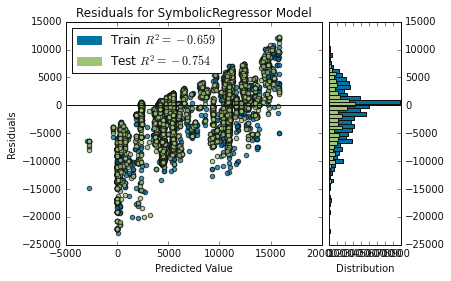

In [112]:
plot_model(sc_trained)

In [113]:
print(sc_trained)

add(sub(add(div(mul(X0, add(add(X29, -0.843), add(div(mul(add(add(div(mul(add(add(X6, X19), sub(X15, X0)), div(X31, X5)), add(X3, X5)), sub(add(X34, X19), add(X4, X19))), add(sub(X15, X0), sub(X15, X0))), div(X31, X5)), add(X3, X5)), sub(add(X34, X19), add(X4, X19))))), add(X3, X5)), sub(add(X34, X19), add(X4, X19))), div(sub(sub(sub(-0.549, X16), sub(0.483, X5)), div(div(X9, X16), div(X20, X27))), div(sub(sub(X8, X35), sub(X9, X40)), add(div(X18, X12), sub(X2, X15))))), mul(add(add(sub(sub(sub(div(mul(X0, X38), add(X3, X5)), sub(X22, X31)), add(sub(X14, X35), add(X17, X1))), sub(X0, X3)), add(add(X29, -0.843), add(div(mul(X0, add(add(X29, -0.843), add(div(mul(add(add(X6, X19), sub(X15, X0)), div(X31, X5)), add(X3, X5)), sub(add(X34, X19), add(X4, X19))))), add(X3, X5)), sub(add(X34, X19), add(X4, X19))))), div(add(div(sub(sub(sub(X24, X16), add(X25, X38)), sub(sub(X7, X11), sub(X24, X35))), sub(X11, X22)), sub(add(X35, X38), add(X18, X37))), add(add(-0.670, X0), div(X19, X28)))), add(

In [114]:
# check hold-out score
pred_holdout_sc = predict_model(sc_trained)

Model        MAE           MSE       RMSE      R2   RMSLE   MAPE
0  SymbolicRegressor  3984.2723  2.876159e+07  5362.9832 -0.7538  1.5586  0.444

In [126]:
evaluate_model(sc_trained)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

***NGBoost Models*** - ngboost is a Python library that implements Natural Gradient Boosting, as described in “NGBoost: Natural Gradient Boosting for Probabilistic Prediction”. It is built on top of Scikit-Learn and is designed to be scalable and modular with respect to the choice of proper scoring rule, distribution, and base learner.

In [115]:
!pip install ngboost

In [116]:
# import untrained estimator
from ngboost import NGBRegressor
ng = NGBRegressor()
# train using create_model
ng_trained = create_model(ng)

MAE           MSE       RMSE      R2   RMSLE    MAPE
0     1688.3800  5.138691e+06  2266.8682  0.7044  0.2596  0.2153
1     1668.2372  4.875974e+06  2208.1609  0.6978  0.2640  0.2219
2     1614.4683  4.592353e+06  2142.9776  0.7106  0.2632  0.2166
3     1588.4034  4.298644e+06  2073.3172  0.7524  0.2388  0.1974
4     1691.6582  5.065031e+06  2250.5623  0.6871  0.2585  0.2155
5     1687.0833  4.988279e+06  2233.4455  0.7030  0.2562  0.2150
6     1604.4152  4.216763e+06  2053.4757  0.7215  0.2518  0.2118
7     1706.5011  4.894278e+06  2212.3014  0.7048  0.2589  0.2218
8     1725.6920  5.409799e+06  2325.8974  0.6928  0.2588  0.2083
9     1679.9050  4.685114e+06  2164.5123  0.7218  0.2541  0.2149
Mean  1665.4744  4.816493e+06  2193.1519  0.7096  0.2564  0.2139
SD      44.1273  3.538413e+05    81.1014  0.0177  0.0068  0.0067

In [117]:
print(ng_trained)

NGBRegressor(Base=DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse',
                                        max_depth=3, max_features=None,
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=None,
                                        splitter='best'),
             Dist=<class 'ngboost.distns.normal.Normal'>,
             Score=<class 'ngboost.scores.LogScore'>, col_sample=1.0,
             learning_rate=0.01, minibatch_frac=1.0, n_estimators=500,
             natural_gradient=True,
             random_state=RandomState(MT19937) at 0x7F81011B5050, tol=0.0001,
             verbose=True, verbose_eval=100)


In [125]:
evaluate_model(ng_trained)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

***Trying my own customissed model*** - The above two examples gplearn and ngboost are custom models for pycaret as they are not available in the default library but you can use them just like you can use any other out-of-the-box models. However, there may be a use-case that involves writing your own algorithm (i.e. maths behind the algorithm), in which case you can inherit the base class from sklearn and write your own maths.
Let’s create a naive estimator which learns the mean value of target variable during fit stage and predicts the same mean value for all new data points, irrespective of X input (probably not useful in real life, but just to make demonstrate the functionality).

In [118]:
# create custom estimator
import numpy as np
from sklearn.base import BaseEstimator
class MyOwnModel(BaseEstimator):
    
    def __init__(self):
        self.mean = 0
        
    def fit(self, X, y):
        self.mean = y.mean()
        return self
    
    def predict(self, X):
        return np.array(X.shape[0]*[self.mean])

In [119]:
# import MyOwnModel class
mom = MyOwnModel()
# train using create_model
mom_trained = create_model(mom)

MAE           MSE       RMSE      R2   RMSLE    MAPE
0     3545.2635  1.738509e+07  4169.5430 -0.0000  0.5222  0.5445
1     3406.6781  1.613997e+07  4017.4587 -0.0003  0.5143  0.5328
2     3425.3376  1.591401e+07  3989.2363 -0.0028  0.5224  0.5506
3     3579.7263  1.745310e+07  4177.6909 -0.0054  0.5139  0.5234
4     3381.0128  1.619175e+07  4023.8978 -0.0001  0.5085  0.5215
5     3467.1227  1.679452e+07  4098.1118 -0.0001  0.5022  0.5137
6     3357.7681  1.516827e+07  3894.6467 -0.0019  0.5081  0.5303
7     3470.3341  1.658401e+07  4072.3469 -0.0003  0.5269  0.5513
8     3605.8351  1.768101e+07  4204.8790 -0.0040  0.5128  0.5253
9     3494.1991  1.684079e+07  4103.7530 -0.0001  0.5177  0.5347
Mean  3473.3277  1.661525e+07  4075.1564 -0.0015  0.5149  0.5328
SD      79.4720  7.419694e+05    91.3921  0.0019  0.0072  0.0120

In [ ]:
evaluate_model(mom_trained)

In [120]:
# generate predictions on data
predictions = predict_model(mom_trained, data=Data)
predictions

Destination  Route  Total_Stops  ... Month  Day of Week        Label
0                5     18            4  ...     3            6  8807.597656
1                0     84            1  ...     1            5  8807.597656
2                1    118            1  ...     9            4  8807.597656
3                0     91            0  ...    12            3  8807.597656
4                5     29            0  ...     1            3  8807.597656
...            ...    ...          ...  ...   ...          ...          ...
10678            0     64            4  ...     9            2  8807.597656
10679            0     64            4  ...     4            5  8807.597656
10680            2     18            4  ...     4            5  8807.597656
10681            5     18            4  ...     1            3  8807.597656
10682            1    108            1  ...     9            3  8807.597656

[10344 rows x 8 columns]